# Student Performance Indicator

## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

In [76]:
# importing libraries 
!pip install seaborn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
#import the dataset

df = pd.read_csv('stud.csv')

In [78]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [79]:
df.shape

(1000, 8)

Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

## 3.Data Checks to perform
Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [80]:
# check for null values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [81]:
#check if any duplicate row exists
df.duplicated().sum()

0

In [82]:
#check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [83]:
# check number of unique values in dataframe 
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [84]:
#statistics of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [85]:
# print all the unique values of categorical variables 

print("Categories in gender variable: ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable: " ,end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [86]:
#seperate out numeric and categorical variables

categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_variables = [feature for feature in df.columns if df[feature].dtype != 'O']

print("There are {0} categorical features namely {1}".format(len(categorical_variables),set(categorical_variables)))
print("There are {0} numeric  features namely {1}".format(len(numeric_variables),set(numeric_variables)))


There are 5 categorical features namely {'test_preparation_course', 'race_ethnicity', 'gender', 'lunch', 'parental_level_of_education'}
There are 3 numeric  features namely {'writing_score', 'reading_score', 'math_score'}


In [87]:
# addding extra columns as total marks and average marks 

df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [88]:
#counting number of students who got full marks in respective subjects 

reading_full = df[df['reading_score']==100]['gender'].count()
writing_full = df[df['writing_score']==100]['gender'].count()
math_full = df[df['math_score']==100]['gender'].count()

print(f'Number of students who scored full in reading are: {reading_full}')
print(f'Number of students who scored full in writing are: {writing_full}')
print(f'Number of students who scored full in maths are: {math_full}')

Number of students who scored full in reading are: 17
Number of students who scored full in writing are: 14
Number of students who scored full in maths are: 7


In [89]:
reading_less_20 = df[df['reading_score'] <= 20]['gender'].count()
writing_less_20 = df[df['writing_score'] <= 20]['gender'].count()
math_less_20 = df[df['math_score'] <= 20]['gender'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
From above values we get students have performed the worst in Maths

Best performance is in reading section

## 4. Exploring Data ( Visualization )


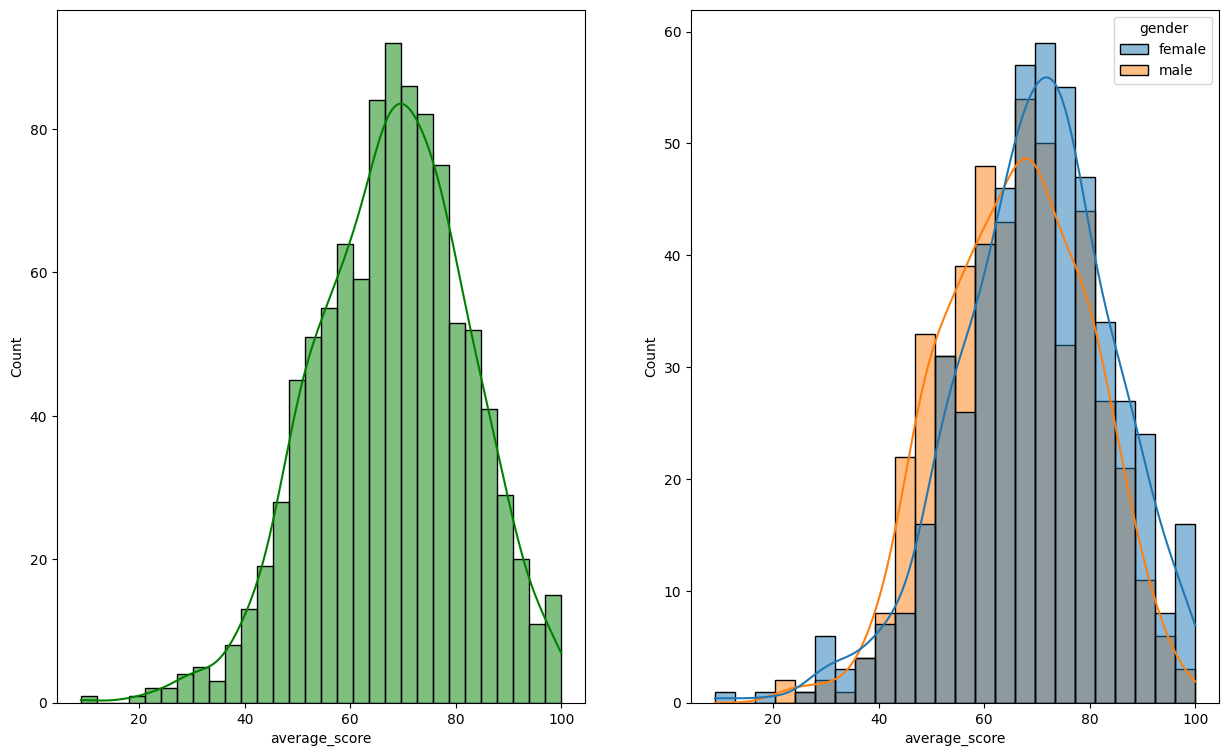

In [90]:
fig, axes = plt.subplots(1,2,figsize = (15,9))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

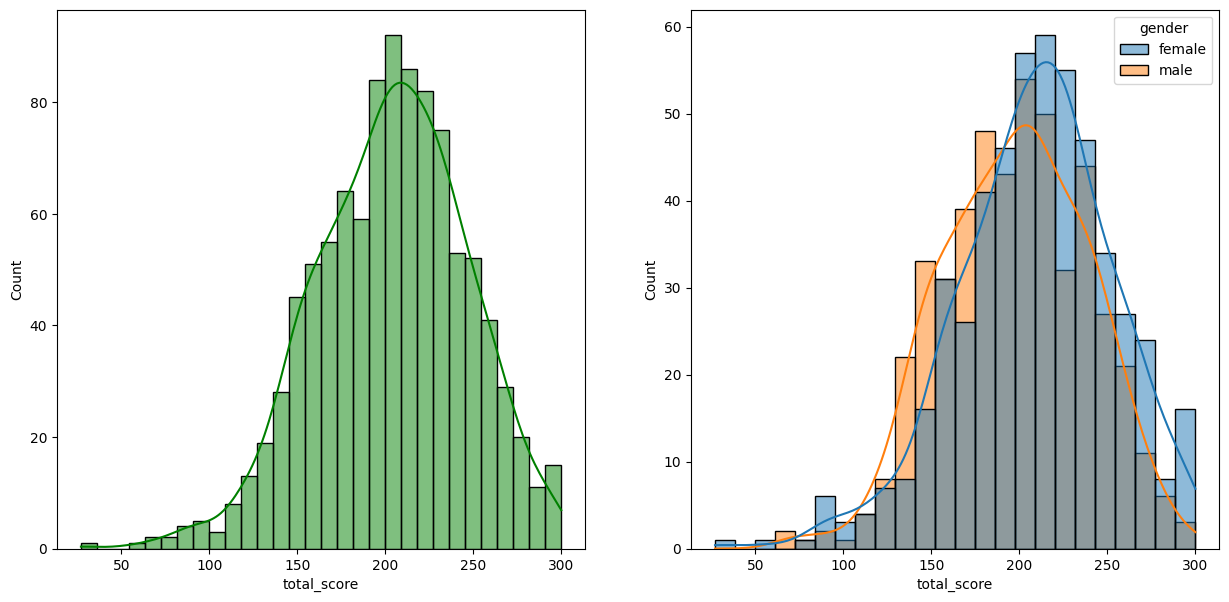

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform well then male students.

C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\1501565293.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\1501565293.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\1501565293.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


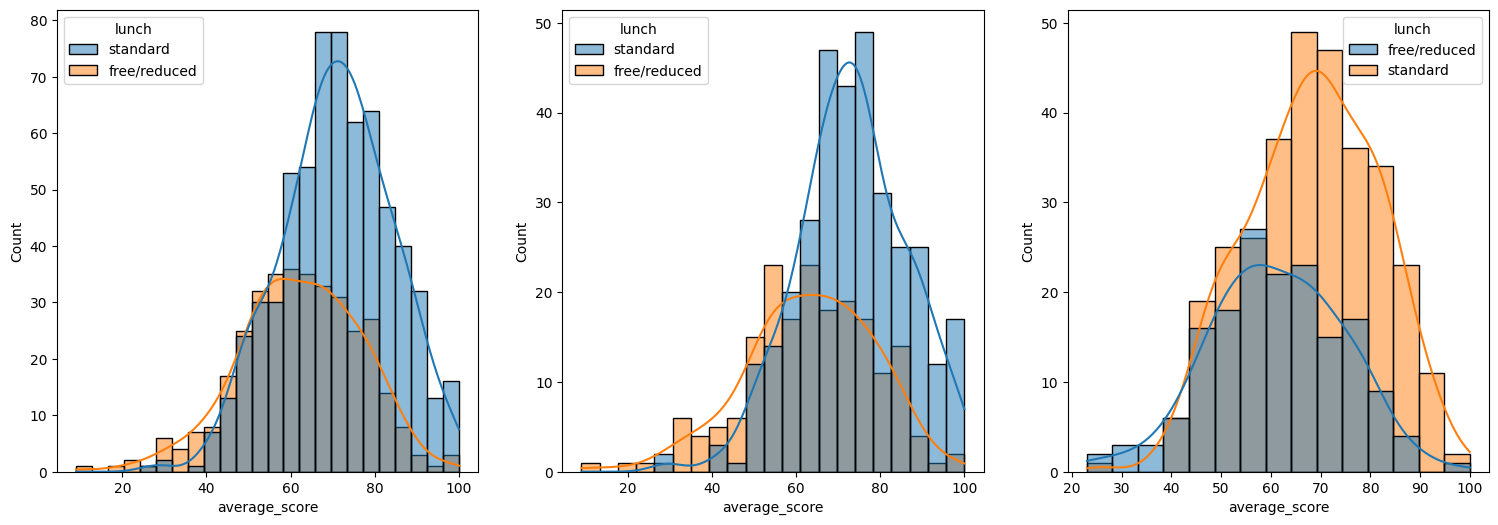

In [92]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

### Insights
Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\254063450.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\254063450.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\254063450.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


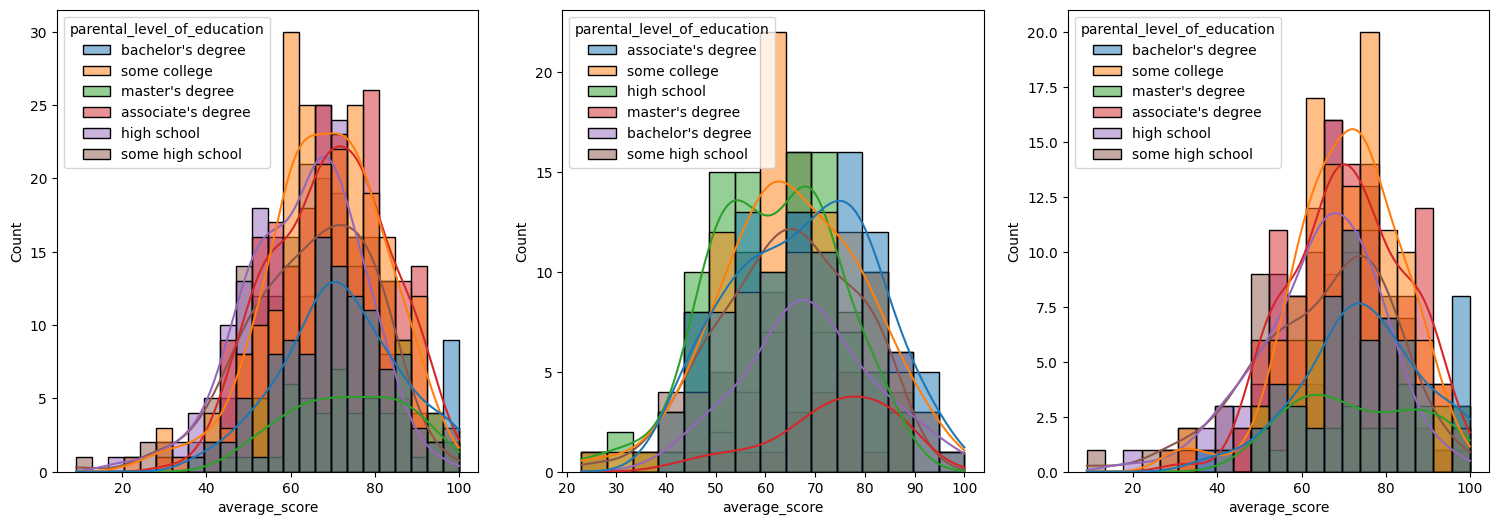

In [93]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\3602838779.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\3602838779.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\3602838779.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


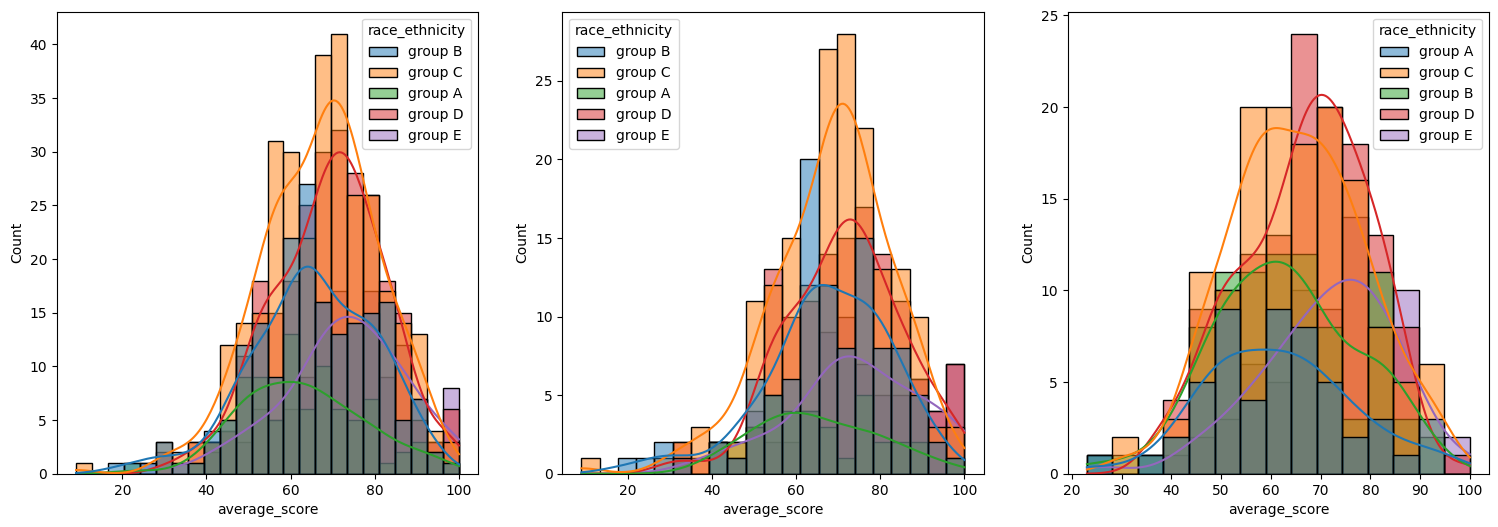

In [94]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

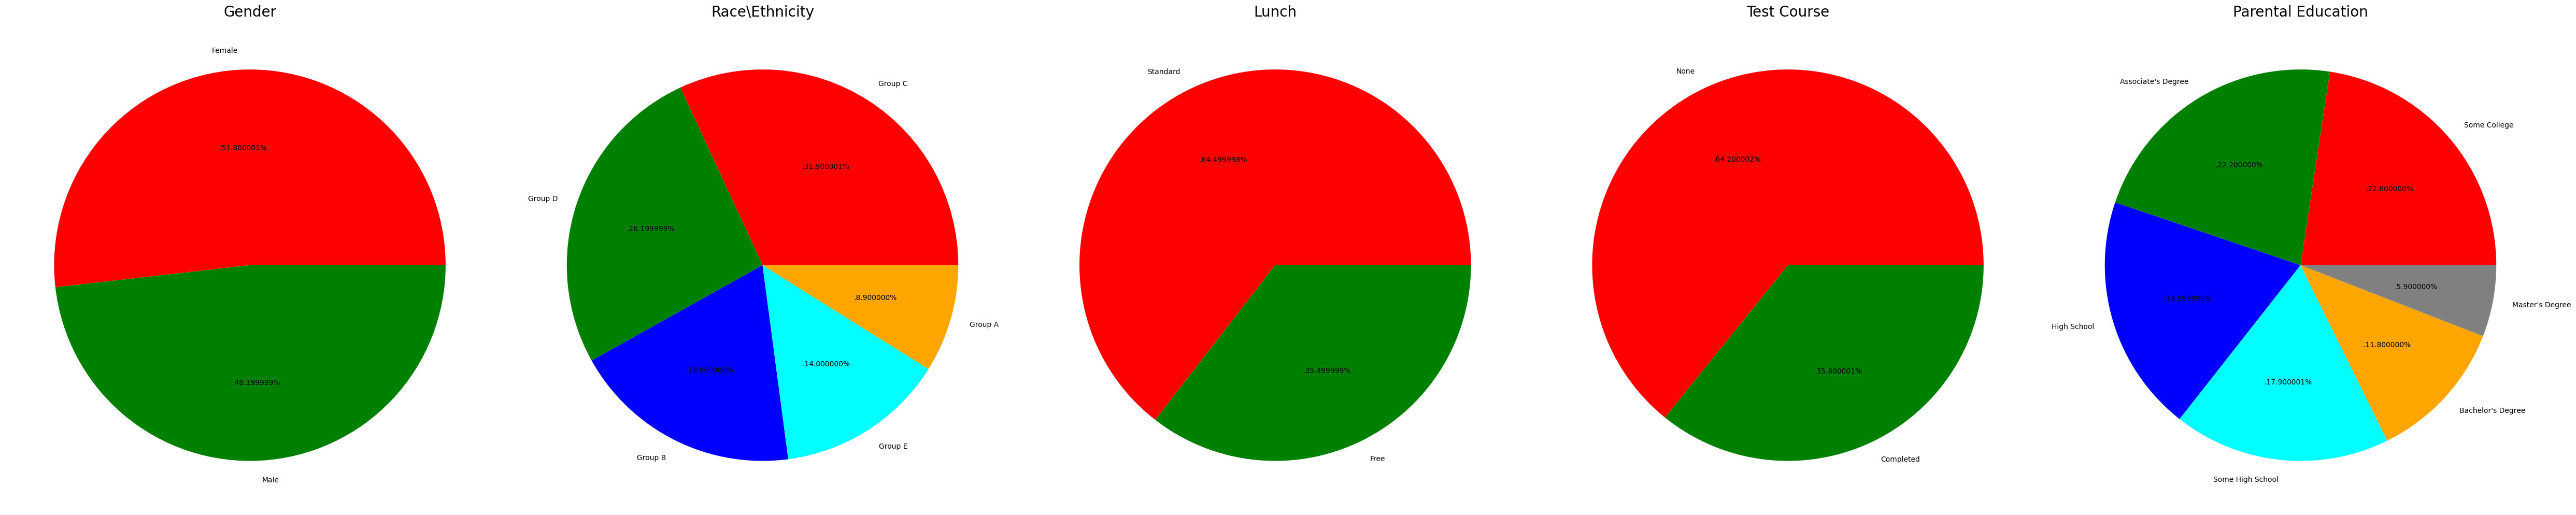

In [95]:
plt.rcParams['figure.figsize'] = (50, 24)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race\Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\1587846526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0])


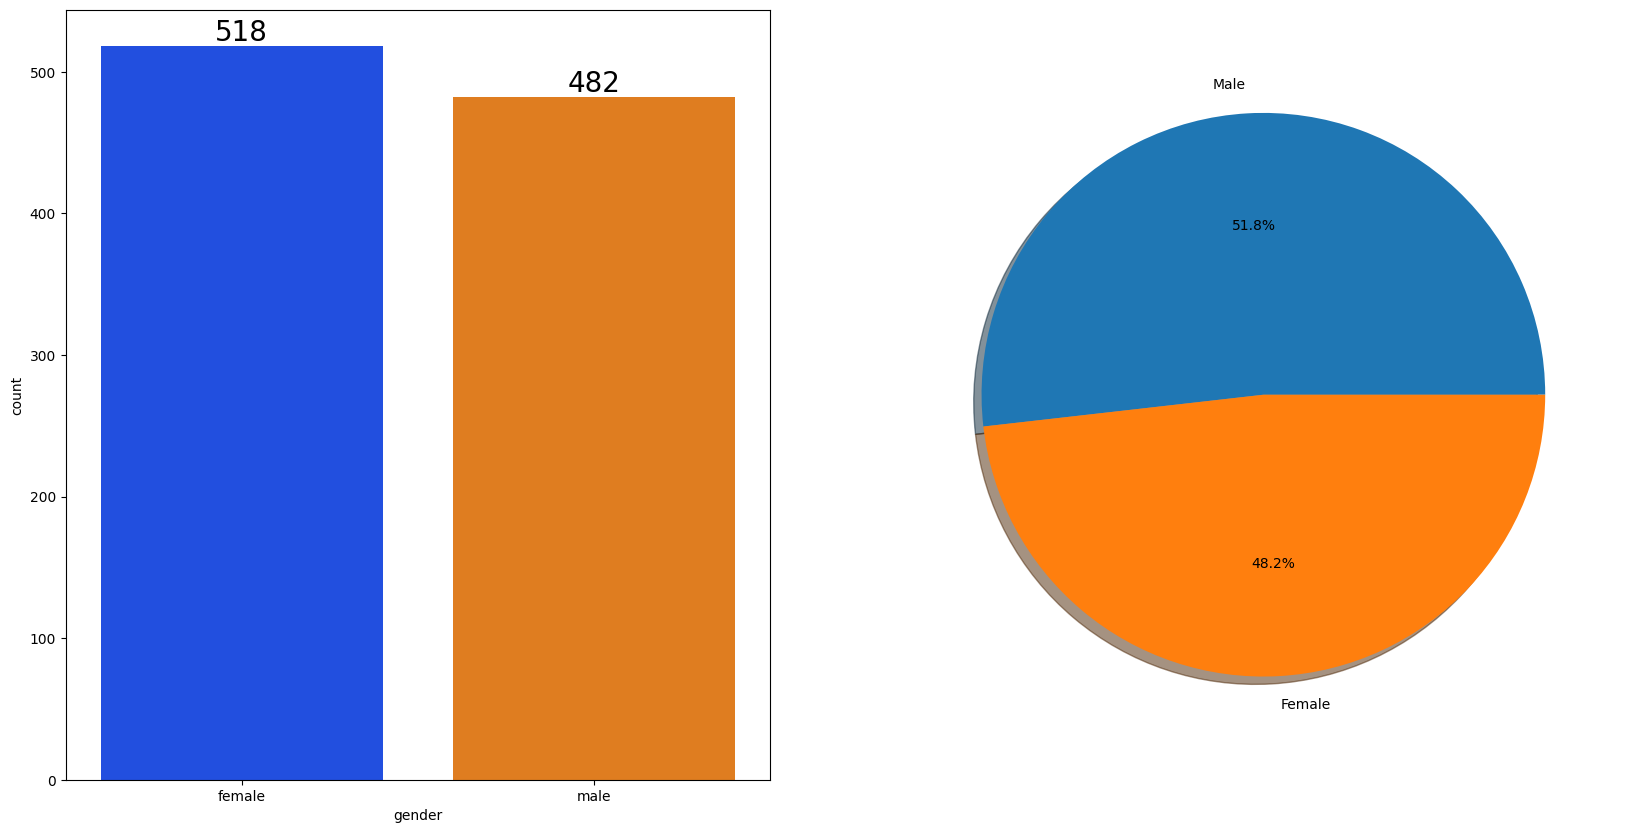

In [96]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True)
plt.show()

In [110]:
gender_group = df.groupby('gender')['total_score'].mean()
gender_group[1] 

C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\182544724.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender_group[1]


197.5124481327801

C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\2205453075.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [df.groupby('gender')['average_score'].mean()[0],df.groupby('gender')['math_score'].mean()[0]]
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\2205453075.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [df.groupby('gender')['average_score'].mean()[0],df.groupby('gender')['math_score'].mean()[0]]
C:\Users\sansk\AppData\Local\Temp\ipykernel_7448\2205453075.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wi

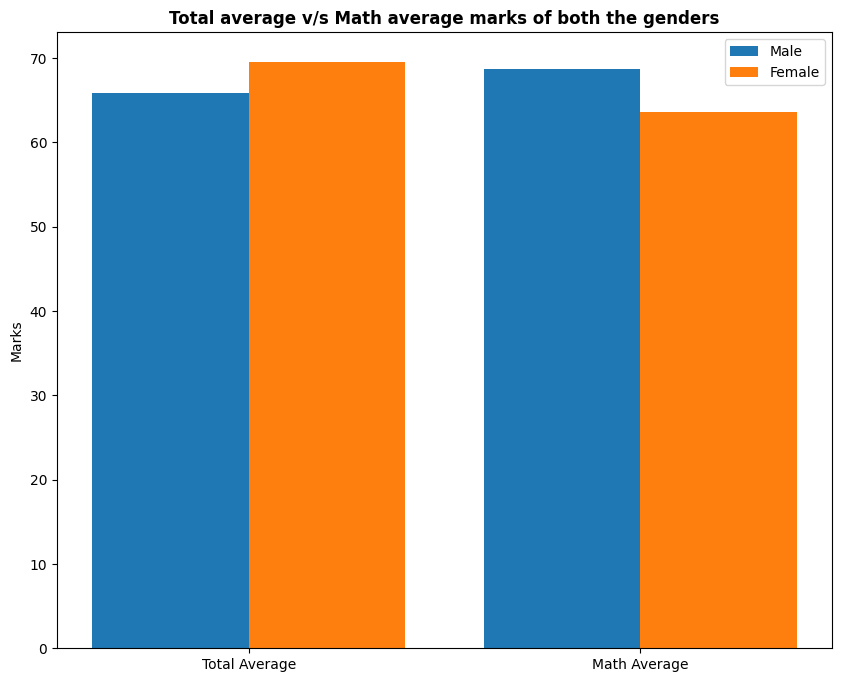

In [117]:

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [df.groupby('gender')['average_score'].mean()[0],df.groupby('gender')['math_score'].mean()[0]]
male_scores = [df.groupby('gender')['average_score'].mean()[1], df.groupby('gender')['math_score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis-0.2 , male_scores, 0.4,label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()